In [13]:
#All the imports & pyplot inline setting
import numpy as np
import random
from scipy.spatial import distance
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.decomposition import PCA
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [14]:
#Accept file name
# iyer.txt
# cho.txt
while True:
    try:
        n_file = str(raw_input('Enter file name:'))
        break
    except ValueError:
        print "Not a string"

Enter file name:cho.txt


In [15]:
#Accept number of clusters
while True:
    try:
        n_clusters = int(raw_input('Enter number of clusters:'))
        break
    except ValueError:
        print "Not a number"

Enter number of clusters:5


In [16]:
#Read from file and separate data into sample id, groundtruth and gene expressions
data = np.genfromtxt(n_file)
data_id = data[:,0]
data_truth = data[:,1]
data_genes = data[:,2:]

In [17]:
#Each is a cluster
clusters = []
for i in data_id:
    clusters.append([i])

In [18]:
#Calculate distance
cluster_distance = distance.cdist(data_genes, data_genes, 'euclidean')
for i in range(len(cluster_distance)):
    cluster_distance[i,i] = float("inf")

In [19]:
#Hierarchical logic
while len(clusters)!=n_clusters:
    x = cluster_distance.argmin()/cluster_distance.shape[1]
    y = cluster_distance.argmin()%cluster_distance.shape[1]
    clusters[x].extend(clusters[y])
    clusters.remove(clusters[y])
    cluster_distance[x] = np.minimum(cluster_distance[x],cluster_distance[y])
    cluster_distance[:,x] = np.minimum(cluster_distance[:,x],cluster_distance[:,y])
    cluster_distance = np.delete(cluster_distance,y, 0)
    cluster_distance = np.delete(cluster_distance,y, 1)
    for i in range(len(cluster_distance)):
        cluster_distance[i,i] = float("inf")

In [20]:
#Create cluster labels for Rand/Jaccard calculation
cluster_assignment = np.zeros(data_id.shape)
for i in range(n_clusters):
    clusters[i][:] = [x - 1 for x in clusters[i]]
    cluster_assignment[clusters[i]] = i

In [21]:
#Function to calculate Rand Index or Jaccard Coefficient
def calScore():
    global rand
    global jaccard
    m11=0.0
    m00=0.0
    m01=0.0
    for i in range(data.shape[0]):
        for j in range(data.shape[0]):
            if data_truth[i]==data_truth[j] and cluster_assignment[i]==cluster_assignment[j]:
                m11 += 1
            elif data_truth[i]!=data_truth[j] and cluster_assignment[i]!=cluster_assignment[j]:
                m00 += 1
            else:
                m01 += 1
    rand = (m11+m00)/(m11+m00+m01)
    jaccard = (m11)/(m11+m01)

In [22]:
#Calculate Rand Index or Jaccard Coefficient
calScore()
print 'RAND:\t',rand
print 'Jaccard:\t',jaccard

RAND:	0.240274906709
Jaccard:	0.228394977574


In [23]:
#Dimensionality reduction using PCA on data points
pca = PCA(n_components=2)
pca.fit(data_genes)
pca_output = pca.transform(data_genes)

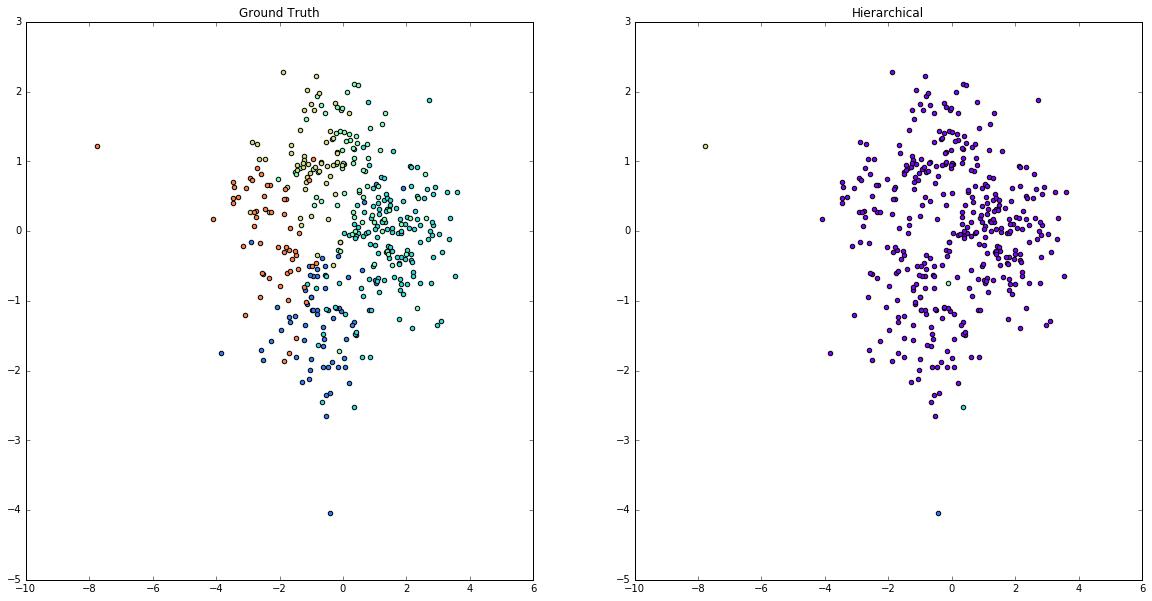

In [24]:
#Plotting ground truth and kmeans clustering results
fig = plt.figure(num=None, figsize=(20, 10), dpi=96, facecolor='w', edgecolor='k')

#10 colour rainbow generation shamelessly copied
# reference
# http://stackoverflow.com/questions/12236566/setting-different-color-for-each-series-in-scatter-plot-on-matplotlib
x = np.arange(n_clusters+2)
ys = [i+x+(i*x)**2 for i in range(n_clusters+2)]
colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    
plt.subplot(121)
for i in range(1,n_clusters+1):
    plt.scatter(pca_output[data_truth==i][:,0],pca_output[data_truth==i][:,1],c=colors[i])
#plt.scatter(pca_output[data_truth==-1][:,0],pca_output[data_truth==-1][:,1],c=colors[0])
plt.title('Ground Truth')
#axes = plt.gca()
#axes.set_xlim([-20,10])
#axes.set_ylim([-5,20])

plt.subplot(122)
for i in range(n_clusters):
    plt.scatter(pca_output[cluster_assignment==i][:,0],pca_output[cluster_assignment==i][:,1],c=colors[i])
plt.title('Hierarchical')
#axes = plt.gca()
#axes.set_xlim([-20,10])
#axes.set_ylim([-5,20])
plt.show()